In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # setting seaborn default for plots
import os

In [2]:
print(os.listdir("."))

train_data = pd.read_csv('data/train_values.csv')
train_labels = pd.read_csv('data/train_labels.csv')
train = train_data.join(train_labels['heart_disease_present'])
test = pd.read_csv('data/test_values.csv')

['.DS_Store', 'WarmUpML.ipynb', 'submission1.csv', 'submission_format.csv', 'submission2.csv', 'README.md', '.ipynb_checkpoints', '.git', 'data']


In [3]:
train_data.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0


In [4]:
train_labels.head()

,patient_id,heart_disease_present
0,0z64un,0
1,ryoo3j,0
2,yt1s1x,1
3,l2xjde,1
4,oyt4ek,0


In [5]:
train.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


In [6]:
train.describe()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667,0.444444
std,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474,0.498290
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000,0.000000
50%,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000,1.000000
max,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000,1.000000


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 15 columns):
patient_id                              180 non-null object
slope_of_peak_exercise_st_segment       180 non-null int64
thal                                    180 non-null object
resting_blood_pressure                  180 non-null int64
chest_pain_type                         180 non-null int64
num_major_vessels                       180 non-null int64
fasting_blood_sugar_gt_120_mg_per_dl    180 non-null int64
resting_ekg_results                     180 non-null int64
serum_cholesterol_mg_per_dl             180 non-null int64
oldpeak_eq_st_depression                180 non-null float64
sex                                     180 non-null int64
age                                     180 non-null int64
max_heart_rate_achieved                 180 non-null int64
exercise_induced_angina                 180 non-null int64
heart_disease_present                   180 non-null int64
dtypes

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 14 columns):
patient_id                              90 non-null object
slope_of_peak_exercise_st_segment       90 non-null int64
thal                                    90 non-null object
resting_blood_pressure                  90 non-null int64
chest_pain_type                         90 non-null int64
num_major_vessels                       90 non-null int64
fasting_blood_sugar_gt_120_mg_per_dl    90 non-null int64
resting_ekg_results                     90 non-null int64
serum_cholesterol_mg_per_dl             90 non-null int64
oldpeak_eq_st_depression                90 non-null float64
sex                                     90 non-null int64
age                                     90 non-null int64
max_heart_rate_achieved                 90 non-null int64
exercise_induced_angina                 90 non-null int64
dtypes: float64(1), int64(11), object(2)
memory usage: 9.9+ KB


In [9]:
#Let's check the number of missing values in all features
print(train.apply(lambda x: sum(x.isnull()), axis=0))
print(test.apply(lambda x: sum(x.isnull()), axis=0))

patient_id                              0
slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
heart_disease_present                   0
dtype: int64
patient_id                              0
slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_

In [10]:
#We have one categorical feature: 'thal'
#Let's convert it to numerical
print(train['thal'].value_counts(ascending=True))

#Let's map it to numerical values
train['thal'] = train['thal'].map( {'fixed_defect': 0, 'reversible_defect': 1, 'normal': 2} ).astype(int)

#We need to map it for test set as well
test['thal'] = test['thal'].map( {'fixed_defect': 0, 'reversible_defect': 1, 'normal': 2} ).astype(int)

fixed_defect          8
reversible_defect    74
normal               98
Name: thal, dtype: int64


In [11]:
train.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,2,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,2,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,2,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,1,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,1,178,1,0,0,2,270,4.2,1,59,145,0,0


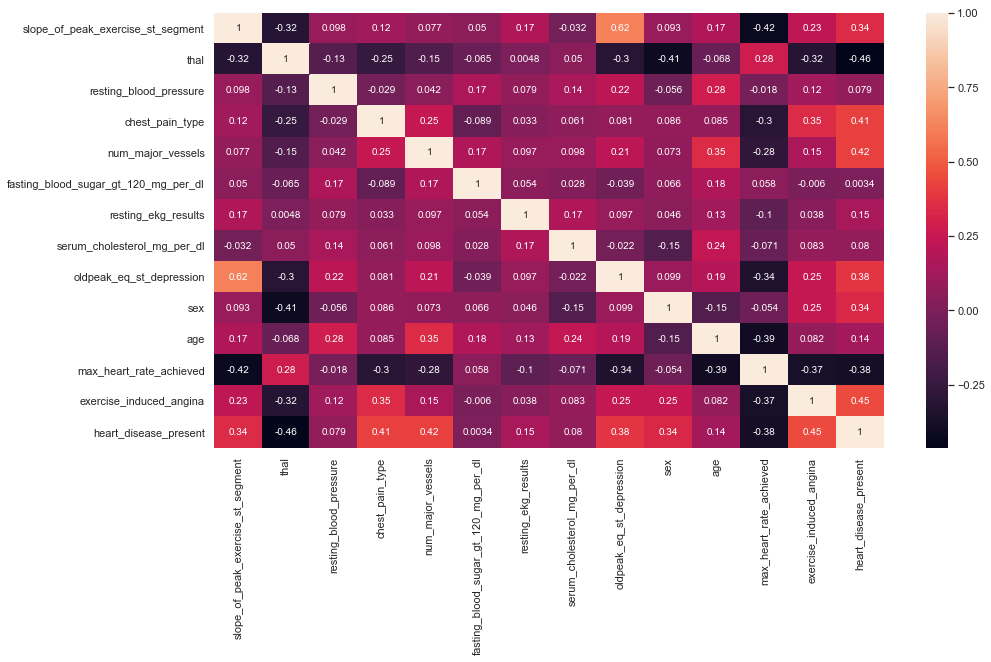

In [12]:
#graphical rep of corr()
figure=plt.figure(figsize=(15,8))
sns.heatmap(train.corr(),annot=True)

In [13]:
#find correlation between 'heart_disease_present' and Other Columns  to see which columns can be useful
train.corr().loc['heart_disease_present']

slope_of_peak_exercise_st_segment       0.344224
thal                                   -0.460933
resting_blood_pressure                  0.078506
chest_pain_type                         0.412829
num_major_vessels                       0.421519
fasting_blood_sugar_gt_120_mg_per_dl    0.003379
resting_ekg_results                     0.145933
serum_cholesterol_mg_per_dl             0.079775
oldpeak_eq_st_depression                0.382930
sex                                     0.335421
age                                     0.138255
max_heart_rate_achieved                -0.375352
exercise_induced_angina                 0.448647
heart_disease_present                   1.000000
Name: heart_disease_present, dtype: float64

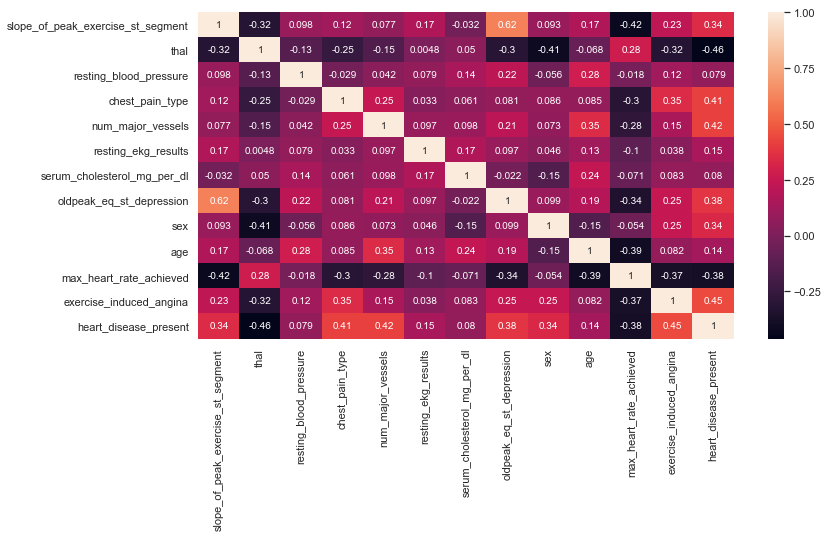

In [14]:
#Let's try by using less features, the ones which are most correlated
correlation_matrix = train.corr()
top_corr_features = correlation_matrix.index[abs(correlation_matrix["heart_disease_present"])>=0.05]
plt.figure(figsize=(12,6))
sns.heatmap(train[top_corr_features].corr(),annot=True)

In [15]:
#Let's drop 'patient_id' and 'fasting_blood_sugar_gt_120_mg_per_dl' 
train_data  = train.drop(['patient_id','fasting_blood_sugar_gt_120_mg_per_dl','heart_disease_present'], axis=1)
train_labels = train['heart_disease_present']
train_data.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,1,2,128,2,0,2,308,0.0,1,45,170,0
1,2,2,110,3,0,0,214,1.6,0,54,158,0
2,1,2,125,4,3,2,304,0.0,1,77,162,1
3,1,1,152,4,0,0,223,0.0,1,40,181,0
4,3,1,178,1,0,2,270,4.2,1,59,145,0


In [16]:
test_data = test.drop(['patient_id', 'fasting_blood_sugar_gt_120_mg_per_dl'], axis=1)
test_data.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,2,1,170,1,0,2,288,0.2,1,59,159,0
1,1,2,138,4,0,0,183,1.4,0,35,182,0
2,2,1,120,4,0,2,177,2.5,1,43,120,1
3,1,2,102,3,1,0,318,0.0,0,60,160,0
4,2,2,138,4,1,2,166,3.6,1,61,125,1


In [17]:
# Importing Classifier Modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [18]:
#k-fold cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
k_fold

KFold(n_splits=10, random_state=0, shuffle=True)

In [23]:
#Ramdom Forest
clf = RandomForestClassifier(n_estimators=13)
scoring = 'neg_log_loss'
score = cross_val_score(clf, train_data, train_labels, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
# Random Forest Score
round(np.mean(score)*100, 2)

[-0.41341598 -0.60408093 -0.70276178 -0.41640594 -0.21381502 -0.42093737
 -0.40123506 -0.54728101 -0.47362017 -0.40214149]


-45.96

In [24]:
clf = SVC(kernel='linear', probability=True)
scoring = 'neg_log_loss'
score = cross_val_score(clf, train_data, train_labels, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
round(np.mean(score)*100,2)

[-0.32977028 -0.42251126 -0.73792852 -0.44376027 -0.25667861 -0.43838882
 -0.66025219 -0.45720942 -0.51536996 -0.4479259 ]


-47.1

In [25]:
#Naive Bayes
clf  ==  GaussianNB()
scoring = 'neg_log_loss'
score = cross_val_score(clf, train_data, train_labels, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
# Naive Bayes Score
round(np.mean(score)*100, 2)

[-0.33552318 -0.4288062  -0.73340918 -0.45065857 -0.24155171 -0.44323455
 -0.64720509 -0.48509096 -0.52332738 -0.42561458]


-47.14

In [26]:
#Decision Tree
clf = DecisionTreeClassifier()
scoring = 'neg_log_loss'
score = cross_val_score(clf, train_data, train_labels, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
# decision tree Score
round(np.mean(score)*100, 2)

[ -7.67537249 -13.43205733 -17.26952146  -7.67537249  -1.91886533
 -13.43187964 -15.35065613 -13.43183522  -9.59423782 -13.43196849]


-1132.12

In [27]:
#kNN
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'neg_log_loss'
score = cross_val_score(clf, train_data, train_labels, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
# kNN Score
round(np.mean(score)*100, 2)

[-0.68601916 -0.54467106 -0.49660271 -2.54260501 -0.59076528 -0.6604662
 -0.69593455 -0.87323622 -0.70197269 -0.74389994]


-85.36

In [28]:
#Random Forest gave max accuracy, Let's use that on Test data
clf = RandomForestClassifier(n_estimators=13)
clf.fit(train_data, train_labels)
prediction = clf.predict_proba(test_data)
prediction[:,1]

array([0.30769231, 0.15384615, 0.92307692, 0.53846154, 0.92307692,
       0.        , 0.38461538, 0.84615385, 0.38461538, 0.15384615,
       0.69230769, 0.30769231, 0.23076923, 0.76923077, 0.23076923,
       0.07692308, 0.        , 0.38461538, 1.        , 0.        ,
       0.92307692, 0.23076923, 0.        , 0.15384615, 0.53846154,
       1.        , 0.53846154, 0.15384615, 0.76923077, 0.        ,
       0.92307692, 0.23076923, 0.53846154, 0.46153846, 0.46153846,
       0.15384615, 0.46153846, 0.23076923, 0.        , 0.23076923,
       0.84615385, 0.23076923, 1.        , 0.15384615, 0.92307692,
       0.23076923, 0.07692308, 0.30769231, 0.38461538, 0.76923077,
       0.46153846, 0.        , 0.92307692, 0.        , 0.38461538,
       0.15384615, 0.61538462, 0.38461538, 0.07692308, 0.92307692,
       0.07692308, 0.92307692, 0.38461538, 0.92307692, 0.23076923,
       0.92307692, 0.92307692, 0.69230769, 0.84615385, 0.76923077,
       0.30769231, 1.        , 1.        , 1.        , 0.92307

In [29]:
submission = pd.DataFrame({
        "patient_id": test["patient_id"],
        "heart_disease_present": prediction[:,1]
    })

submission.head()
submission.to_csv('submission1.csv', index=False)

# Normalizing features

In [30]:
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

# create list of column names to use later
col_names = list(train_data.columns)

n_scaler = Normalizer()
train_data_norm = n_scaler.fit_transform(train_data)
train_data_norm = pd.DataFrame(train_data_norm, columns=col_names)

mm_scaler = MinMaxScaler()
train_data_mm = mm_scaler.fit_transform(train_data)
train_data_mm = pd.DataFrame(train_data_mm, columns=col_names)
                           
r_scaler = RobustScaler()
train_data_r = r_scaler.fit_transform(train_data)
train_data_r = pd.DataFrame(train_data_r, columns=col_names)

s_scaler = StandardScaler()
train_data_s = s_scaler.fit_transform(train_data)
train_data_s = pd.DataFrame(train_data_s, columns=col_names)

/Users/nitikaga/Documents/OMSCS/Fall2018/CODES-FOR-ML/Vaibhav/codeshare/env/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/nitikaga/Documents/OMSCS/Fall2018/CODES-FOR-ML/Vaibhav/codeshare/env/lib/python3.7/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/nitikaga/Documents/OMSCS/Fall2018/CODES-FOR-ML/Vaibhav/codeshare/env/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [31]:
#Ramdom Forest
clf = RandomForestClassifier(n_estimators=13)
scoring = 'neg_log_loss'
score = cross_val_score(clf, train_data_norm, train_labels, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
# Random Forest Score
round(np.mean(score)*100, 2)

[-0.39822631 -0.31436391 -0.53192526 -0.46161046 -0.23911217 -0.45366041
 -0.68915629 -0.60848578 -0.50298725 -0.55431183]


-47.54

In [32]:
#SVC
clf = SVC(kernel='linear', probability=True)
scoring = 'neg_log_loss'
score = cross_val_score(clf, train_data_norm, train_labels, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
round(np.mean(score)*100,2)

[-0.65419819 -0.63254273 -0.63576326 -0.65686198 -0.60222436 -0.65644503
 -0.76692723 -0.73922395 -0.70421754 -0.66043904]


-67.09

In [33]:
#SVC gave max accuracy on train_data_mm, Let's use that on Test data
clf = RandomForestClassifier(n_estimators=13)
clf.fit(train_data_norm, train_labels)
prediction = clf.predict_proba(test_data)
prediction[:,1]

array([0.76923077, 0.46153846, 0.76923077, 0.46153846, 0.69230769,
       0.46153846, 0.46153846, 0.76923077, 0.38461538, 0.38461538,
       0.61538462, 0.69230769, 0.30769231, 0.76923077, 0.38461538,
       0.15384615, 0.15384615, 0.15384615, 0.69230769, 0.38461538,
       0.69230769, 0.61538462, 0.69230769, 0.46153846, 0.38461538,
       0.61538462, 0.61538462, 0.38461538, 0.69230769, 0.15384615,
       0.76923077, 0.61538462, 0.61538462, 0.61538462, 0.15384615,
       0.15384615, 0.38461538, 0.69230769, 0.38461538, 0.38461538,
       0.69230769, 0.69230769, 0.69230769, 0.38461538, 0.69230769,
       0.76923077, 0.15384615, 0.69230769, 0.76923077, 0.76923077,
       0.76923077, 0.61538462, 0.69230769, 0.61538462, 0.53846154,
       0.61538462, 0.69230769, 0.69230769, 0.76923077, 0.84615385,
       0.61538462, 0.76923077, 0.38461538, 0.69230769, 0.38461538,
       0.69230769, 0.69230769, 0.69230769, 0.76923077, 0.46153846,
       0.61538462, 0.69230769, 0.69230769, 0.69230769, 0.76923

In [34]:
submission = pd.DataFrame({
        "patient_id": test["patient_id"],
        "heart_disease_present": prediction[:,1]
    })

submission.head()
submission.to_csv('submission2.csv', index=False)